In [1]:
import pandas as pd
import px_reader as px
from helpers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diplome_bourses = read_file('diplome-bourses.px')
diplome_bourses.index.names = ['annee', 'region', 'etude']
diplome_bourses.head(11)

Montant verse en frs  \
annee region etude                                                                     
2004  Suisse Degres de formation - Total                                   279331456   
             Scolarite obligatoire                                            702606   
             Maturite gymnasiale                                            31538221   
             Autres formations generales                                    19119665   
             Formation professionnelle initiale (e plein temps)             28730192   
             Formation professionnelle initiale (duale)                     43206126   
             Maturite professionnelle (apres l'apprentissage)                2615122   
             Formation professionnelle superieure                           18765970   
             Hautes ecoles specialisees et pedagogiques                     42855197   
             Hautes ecoles universitaires                                   87804126   
             Formation continue                                              3994231   

                                                                Nombre de beneficiaires  
annee region etude                                                                       
2004  Suisse Degres de formation - Total                                          49496  
             Scolarite obligatoire                                                  214  
             Maturite gymnasiale                                                   7792  
             Autres formations generales                                           4969  
             Formation professionnelle initiale (e plein temps)                    6093  
             Formation professionnelle initiale (duale)                           10104  
             Maturite professionnelle (apres l'apprentissage)                       613  
             Formation professionnelle superieure                                  2397  
             Hautes ecoles specialisees et pedagogiques                            6019  
             Hautes ecoles universitaires                                         11775  
             Formation continue                                                     663

In [5]:
def get_df_bourse(region = 'Suisse', etude ='Hautes ecoles universitaires'):
    tmp_df = diplome_bourses.xs(region, level = 'region', axis = 0)
    tmp_df = tmp_df.xs(etude, level = 'etude', axis = 0)
    tmp_df = parse_df(tmp_df, 0)
    tmp_df['Montant bourse'] = tmp_df['Montant verse en frs'] / tmp_df['Nombre de beneficiaires']
    return tmp_df

In [14]:
type_region = list(diplome_bourses.index.get_level_values('region').unique())
type_etude = list(diplome_bourses.index.get_level_values('etude').unique())
years = list(diplome_bourses.index.get_level_values('annee').unique())

In [15]:
type_region

['Suisse',
 'Zerich',
 'Bern / Berne',
 'Luzern',
 'Uri',
 'Schwyz',
 'Obwalden',
 'Nidwalden',
 'Glarus',
 'Zug',
 'Fribourg / Freiburg',
 'Solothurn',
 'Basel-Stadt',
 'Basel-Landschaft',
 'Schaffhausen',
 'Appenzell Ausserrhoden',
 'Appenzell Innerrhoden',
 'St. Gallen',
 'Graubenden / Grigioni / Grischun',
 'Aargau',
 'Thurgau',
 'Ticino',
 'Vaud',
 'Valais / Wallis',
 'Neuchetel',
 'Geneve',
 'Jura']

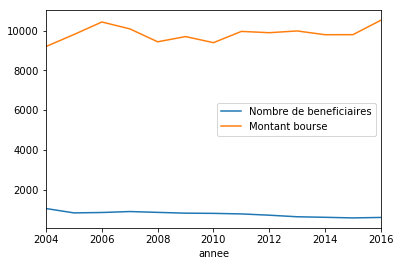

In [13]:
bourse_uni = get_df_bourse('Zerich')
bourse_uni[['Nombre de beneficiaires', 'Montant bourse']].plot(kind = 'line', logy = False)

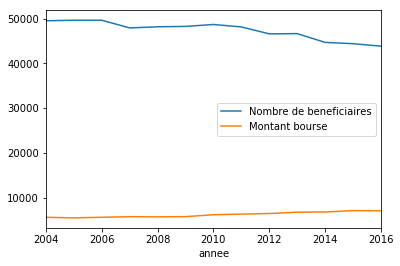

In [10]:
bourse_total = get_df_bourse('Suisse', 'Degres de formation - Total')
bourse_total[['Nombre de beneficiaires', 'Montant bourse']].plot(kind = 'line', logy = False)